In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
import warnings

from IPython.display import display

from scipy import stats
from scipy.stats import norm, skew

from pandas.api.types import CategoricalDtype
#MODELING
from pprint import pprint

from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.cluster import KMeans

In [117]:
#DATA CLEANING
df = pd.read_csv('Data/police_killings.csv', encoding = "ISO-8859-1", engine='python')
missingVals = ['Unknown']
df.head(5)
df.drop(['day','city','state_fp','county_fp','tract_ce','geo_id','county_id', 'latitude','longitude','month'], axis=1, inplace=True)
df.drop(['name', 'year','streetaddress','namelsad','lawenforcementagency'], axis=1, inplace=True)
df.drop(['nat_bucket', 'county_bucket','p_income'], axis=1, inplace=True)
df = df.dropna()
df.isnull().sum()
#Here you can see that we deleted all of the rows that had null values

#*NEEDS WORK*
#Delete all rows that are "Unkown", "-" and maybe delete or fill the NA and 0
df = df[df.age != "Unknown"]
# df = df[(df.p_income != "Unknown") | (df.p_income != "-")]
df = df[(df.share_white != "Unknown") | (df.share_white != "-")]
df = df[(df.share_black != "Unknown") | (df.share_black != "-")]
df = df[(df.share_hispanic != "Unknown") | (df.share_hispanic != "-")]
df = df[(df.pov != "Unknown") | (df.pov != "-")]
# df = df[(df.h_income != "Unknown") | (df.h_income != "-")]

#Convert objects to int and float
df["age"] = df["age"].astype(str).astype(int)
# df["p_income"] = df["p_income"].astype(str).astype(float)
df["share_white"] = df["share_white"].astype(str).astype(float)
df["share_black"] = df["share_black"].astype(str).astype(float)
df["share_hispanic"] = df["share_hispanic"].astype(str).astype(float)
df["pov"] = df["pov"].astype(str).astype(float)

# df['gender']=df['gender'].astype('category').cat.codes
df['raceethnicity']=df['raceethnicity'].astype('category').cat.codes
# df['month']=df['month'].astype('category').cat.codes
df['state']=df['state'].astype('category').cat.codes
df['cause']=df['cause'].astype('category').cat.codes
df['armed']=df['armed'].astype('category').cat.codes

# df.drop(['day','city','state_fp','county_fp','tract_ce','geo_id','county_id', 'latitude','longitude','month'], axis=1, inplace=True)

df = df.dropna()
# df.isnull().sum()




In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 461 entries, 0 to 466
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             461 non-null    int32  
 1   gender          461 non-null    object 
 2   raceethnicity   461 non-null    int8   
 3   state           461 non-null    int8   
 4   cause           461 non-null    int8   
 5   armed           461 non-null    int8   
 6   pop             461 non-null    int64  
 7   share_white     461 non-null    float64
 8   share_black     461 non-null    float64
 9   share_hispanic  461 non-null    float64
 10  h_income        461 non-null    float64
 11  county_income   461 non-null    int64  
 12  comp_income     461 non-null    float64
 13  pov             461 non-null    float64
 14  urate           461 non-null    float64
 15  college         461 non-null    float64
dtypes: float64(8), int32(1), int64(2), int8(4), object(1)
memory usage: 46.8+ KB


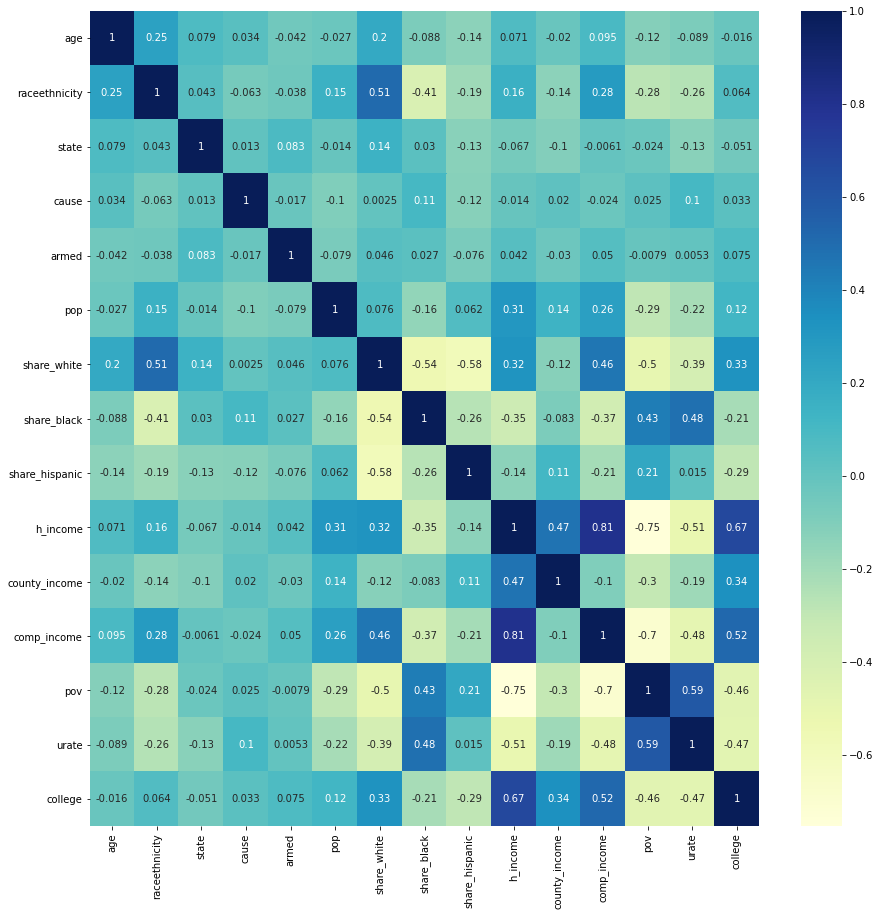

In [119]:
plt.figure(figsize=(15,15))
correlation=df.corr()
sns.heatmap(correlation,cmap='YlGnBu',annot=True)

C:\Users\doloy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\doloy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\doloy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

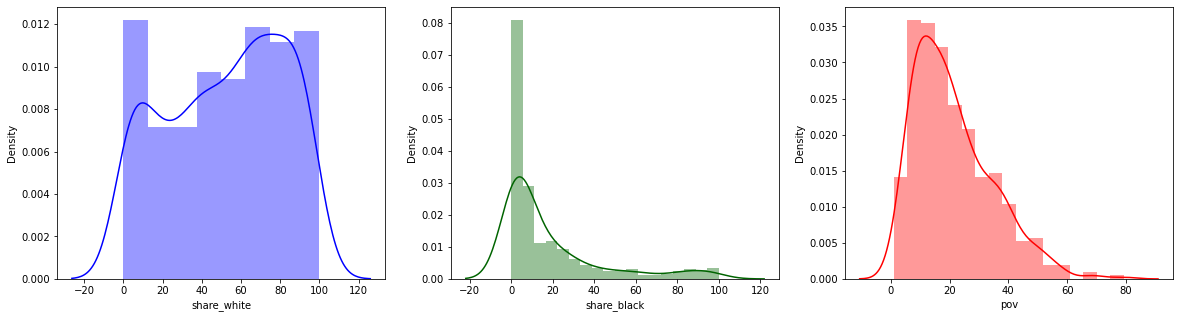

In [120]:
f, axes = plt.subplots(1, 3, figsize=(20, 5)) #sharex=True)

sns.distplot(df['share_white'], color='blue', label="share_white", ax=axes[0])
sns.distplot(df['share_black'], color='darkgreen', label="share_black", ax=axes[1])
sns.distplot(df['pov'], color='red', label="pov", ax=axes[2])
plt.show()

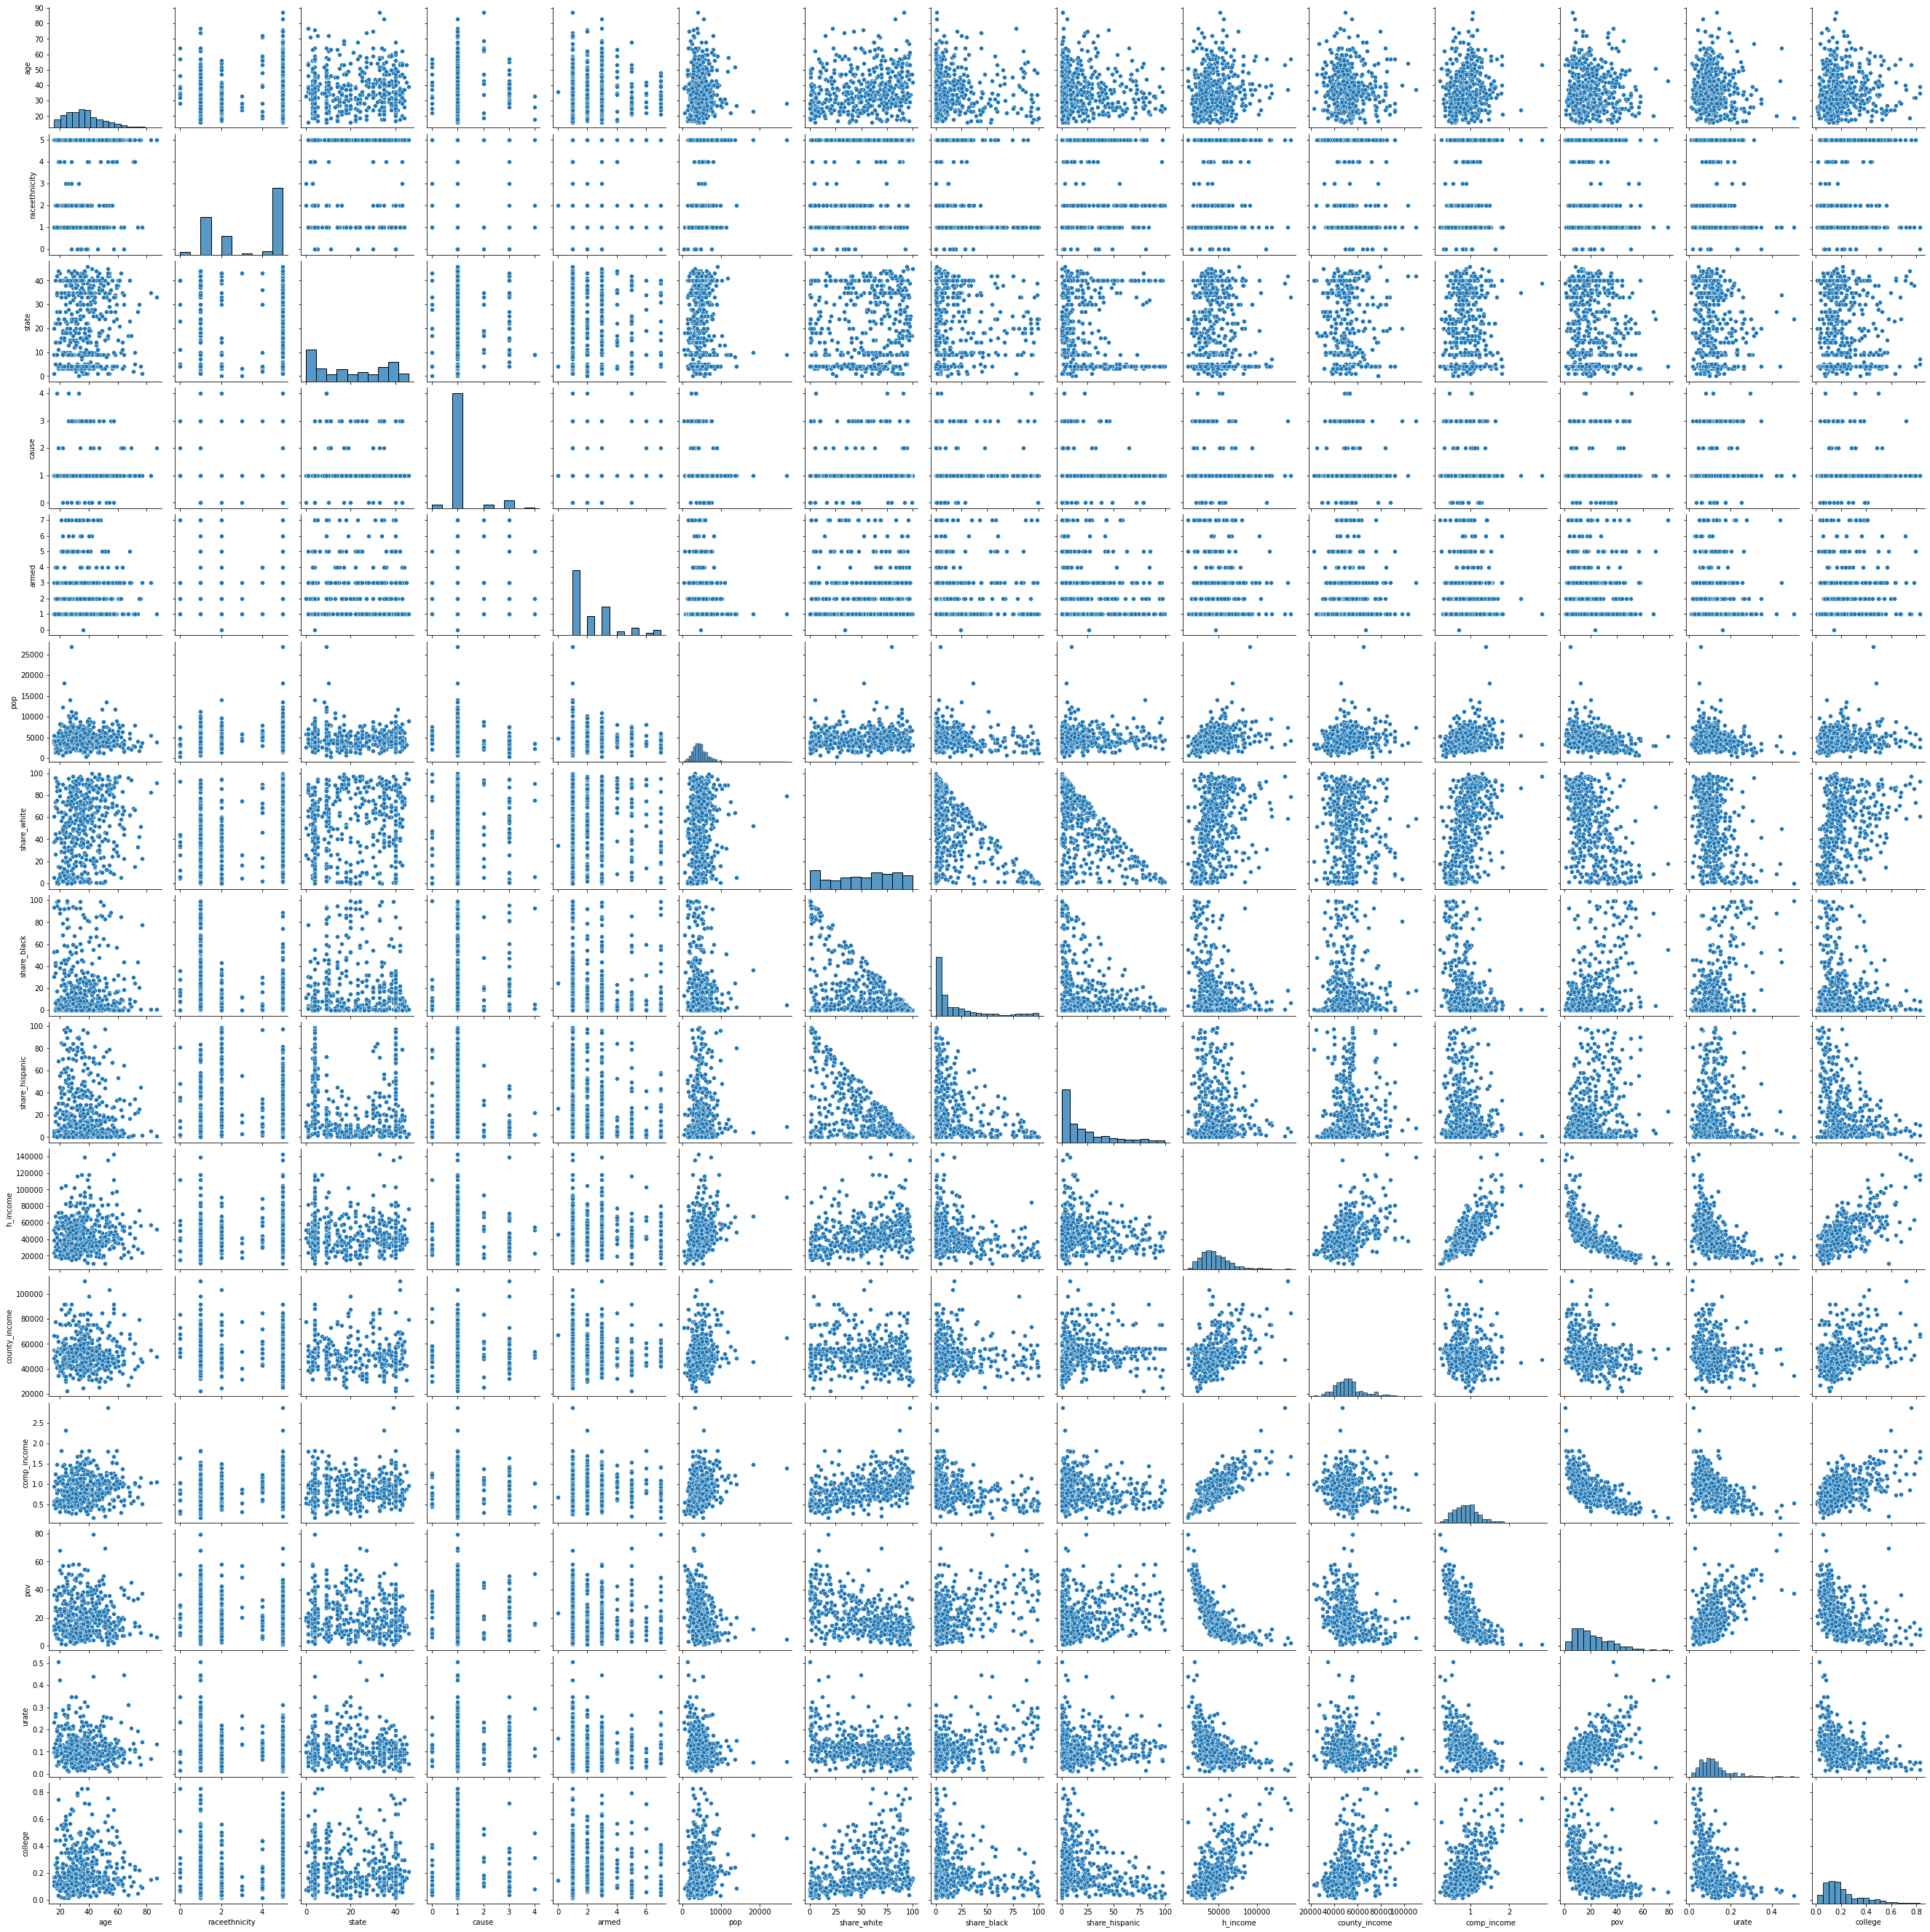

In [121]:
sns.pairplot(df)
plt.show()

In [122]:
# X1 = df[['raceethnicity', 'pov']].values
# inertia_list1 = []

# for n in range(1, 14):
#     model = KMeans(n_clusters=n)
#     model.fit(X1)
#     inertia_list1.append(model.inertia_)
    
#     model1 = KMeans(n_clusters=3)
# model1.fit(X1)

# labels1=model1.labels_

# X2 = df[['h_income', 'age']].values
# inertia_list2 = []

# for n in range(1, 14):
#     model = KMeans(n_clusters=n)
#     model.fit(X2)
#     inertia_list2.append(model.inertia_)
    
#     model2 = KMeans(n_clusters=3)
# model2.fit(X2)

# labels2=model2.labels_

In [123]:
X1 = df[['raceethnicity', 'age']].values
inertia_list1 = []

for n in range(1, 14):
    model = KMeans(n_clusters=n)
    model.fit(X1)
    inertia_list1.append(model.inertia_)

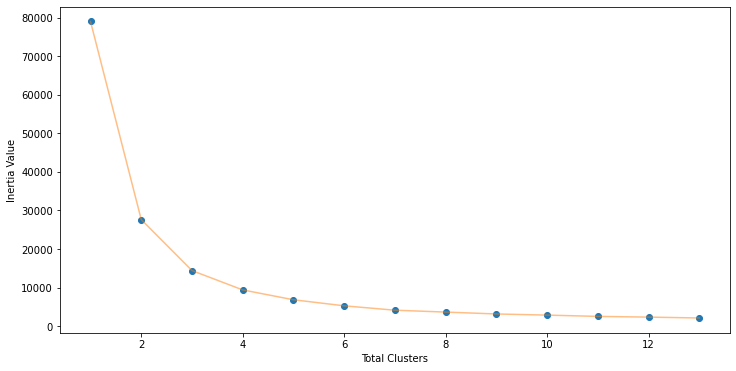

In [124]:
plt.figure(1, figsize = (12, 6))
plt.plot(np.arange(1, 14), inertia_list1, 'o')
plt.plot(np.arange(1, 14), inertia_list1, '-', alpha = 0.5)
plt.xlabel('Total Clusters'), plt.ylabel('Inertia Value')
plt.show()

In [125]:
model1 = KMeans(n_clusters=3)
model1.fit(X1)

labels1=model1.labels_

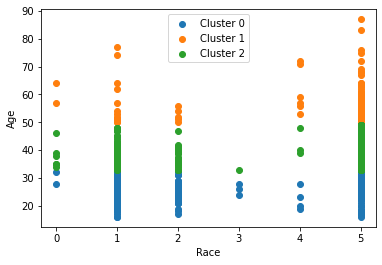

In [126]:
for c in set(labels1):  
    plt.scatter(X1[model1.labels_ == c, 0],
                X1[model1.labels_ == c, 1],
                label='Cluster {}'.format(c))
plt.xlabel('Race')
plt.ylabel('Age')
plt.legend()
plt.show()

In [127]:
X2 = df[['college', 'share_black']].values
inertia_list2 = []

for n in range(1, 14):
    model = KMeans(n_clusters=n)
    model.fit(X2)
    inertia_list2.append(model.inertia_)

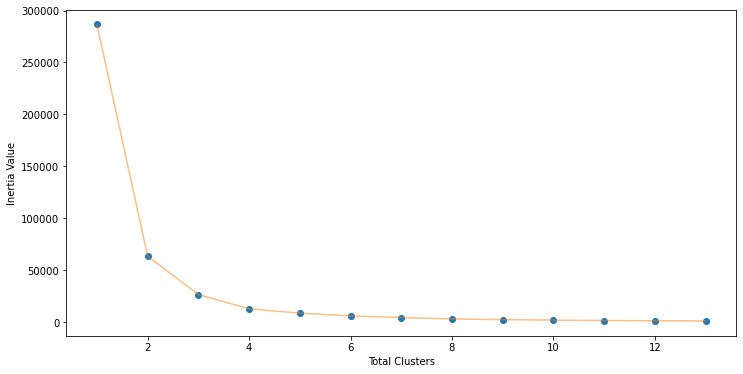

In [128]:
plt.figure(1, figsize = (12, 6))
plt.plot(np.arange(1, 14), inertia_list2, 'o')
plt.plot(np.arange(1, 14), inertia_list2, '-', alpha = 0.5)
plt.xlabel('Total Clusters'), plt.ylabel('Inertia Value')
plt.show()

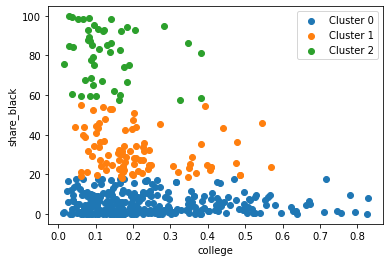

In [129]:
model2 = KMeans(n_clusters=3)
model2.fit(X2)

labels2=model2.labels_


for c in set(labels2):  
    plt.scatter(X2[model2.labels_ == c, 0],
                X2[model2.labels_ == c, 1],
                label='Cluster {}'.format(c))
plt.xlabel('college')
plt.ylabel('share_black')
plt.legend()
plt.show()

In [130]:
df_cluster = pd.DataFrame({'cluster_id': model1.labels_})
df_new = pd.concat([df, df_cluster], axis=1, sort=False)
df_new.head(5)

,age,gender,raceethnicity,state,cause,armed,pop,share_white,share_black,share_hispanic,h_income,county_income,comp_income,pov,urate,college,cluster_id
0,16.0,Male,1.0,1.0,1.0,3.0,3779.0,60.5,30.5,5.6,51367.0,54766.0,0.937936,14.1,0.097686,0.168510,0.0
1,27.0,Male,5.0,18.0,1.0,3.0,2769.0,53.8,36.2,0.5,27972.0,40930.0,0.683411,28.8,0.065724,0.111402,0.0
2,26.0,Male,5.0,44.0,1.0,3.0,4079.0,73.8,7.7,16.8,45365.0,54930.0,0.825869,14.6,0.166293,0.147312,0.0
3,25.0,Male,2.0,4.0,1.0,1.0,4343.0,1.2,0.6,98.8,48295.0,55909.0,0.863814,11.7,0.124827,0.050133,0.0
4,29.0,Male,5.0,34.0,1.0,3.0,6809.0,92.5,1.4,1.7,68785.0,49669.0,1.384868,1.9,0.063550,0.403954,0.0


In [131]:
df_gender = pd.get_dummies(df_new['gender'])
df_new = df_new.drop(['gender'], axis=1)
df_new = pd.concat([df_new, df_gender], axis=1, sort=False)

df_new = df_new.fillna(df_new.median())

In [132]:
df_new.head()

,age,raceethnicity,state,cause,armed,pop,share_white,share_black,share_hispanic,h_income,county_income,comp_income,pov,urate,college,cluster_id,Female,Male
0,16.0,1.0,1.0,1.0,3.0,3779.0,60.5,30.5,5.6,51367.0,54766.0,0.937936,14.1,0.097686,0.168510,0.0,0,1
1,27.0,5.0,18.0,1.0,3.0,2769.0,53.8,36.2,0.5,27972.0,40930.0,0.683411,28.8,0.065724,0.111402,0.0,0,1
2,26.0,5.0,44.0,1.0,3.0,4079.0,73.8,7.7,16.8,45365.0,54930.0,0.825869,14.6,0.166293,0.147312,0.0,0,1
3,25.0,2.0,4.0,1.0,1.0,4343.0,1.2,0.6,98.8,48295.0,55909.0,0.863814,11.7,0.124827,0.050133,0.0,0,1
4,29.0,5.0,34.0,1.0,3.0,6809.0,92.5,1.4,1.7,68785.0,49669.0,1.384868,1.9,0.063550,0.403954,0.0,0,1


In [133]:
df_new.astype('float32')

,age,raceethnicity,state,cause,armed,pop,share_white,share_black,share_hispanic,h_income,county_income,comp_income,pov,urate,college,cluster_id,Female,Male
0,16.0,1.0,1.0,1.0,3.0,3779.0,60.500000,30.500000,5.600000,51367.0,54766.0,0.937936,14.100000,0.097686,0.168510,0.0,0.0,1.0
1,27.0,5.0,18.0,1.0,3.0,2769.0,53.799999,36.200001,0.500000,27972.0,40930.0,0.683411,28.799999,0.065724,0.111402,0.0,0.0,1.0
2,26.0,5.0,44.0,1.0,3.0,4079.0,73.800003,7.700000,16.799999,45365.0,54930.0,0.825869,14.600000,0.166293,0.147312,0.0,0.0,1.0
3,25.0,2.0,4.0,1.0,1.0,4343.0,1.200000,0.600000,98.800003,48295.0,55909.0,0.863814,11.700000,0.124827,0.050133,0.0,0.0,1.0
4,29.0,5.0,34.0,1.0,3.0,6809.0,92.500000,1.400000,1.700000,68785.0,49669.0,1.384868,1.900000,0.063550,0.403954,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,18.0,1.0,42.0,1.0,3.0,1640.0,40.900002,53.799999,0.000000,27418.0,46166.0,0.593900,35.200001,0.152047,0.120553,1.0,0.0,1.0
463,28.0,3.0,43.0,3.0,1.0,4154.0,74.500000,0.400000,20.200001,35608.0,40368.0,0.882085,27.299999,0.133650,0.174525,1.0,0.0,1.0
464,52.0,5.0,27.0,1.0,1.0,3850.0,83.199997,10.100000,0.300000,38200.0,42017.0,0.909156,28.500000,0.256150,0.072764,1.0,0.0,1.0
465,38.0,1.0,4.0,1.0,1.0,2544.0,21.700001,24.900000,37.099998,63052.0,72112.0,0.874362,23.900000,0.069601,0.396476,1.0,1.0,0.0


In [134]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467 entries, 0 to 466
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             467 non-null    float64
 1   raceethnicity   467 non-null    float64
 2   state           467 non-null    float64
 3   cause           467 non-null    float64
 4   armed           467 non-null    float64
 5   pop             467 non-null    float64
 6   share_white     467 non-null    float64
 7   share_black     467 non-null    float64
 8   share_hispanic  467 non-null    float64
 9   h_income        467 non-null    float64
 10  county_income   467 non-null    float64
 11  comp_income     467 non-null    float64
 12  pov             467 non-null    float64
 13  urate           467 non-null    float64
 14  college         467 non-null    float64
 15  cluster_id      467 non-null    float64
 16  Female          467 non-null    uint8  
 17  Male            467 non-null    uin

In [135]:
X_new = df_new.drop(['cluster_id'], axis=1)
y_new = df_new['cluster_id']

# y_new = y_new.fillna(y_new.median())
# X_new = X_new.fillna(X_new.median())

# y_new = np.nan_to_num(y_new.astype(np.float32))
# X_new = np.nan_to_num(X_new.astype(np.float32))

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2)



In [136]:
decision_tree = DecisionTreeClassifier()
model_decision_tree = decision_tree.fit(X_train, y_train)
y_pred_decision_tree = model_decision_tree.predict(X_test)
y_pred_decision_tree

array([0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 2., 0., 0., 1., 0., 0.,
       2., 0., 0., 2., 1., 2., 2., 0., 0., 1., 0., 1., 2., 0., 0., 0., 2.,
       2., 0., 2., 1., 2., 2., 2., 2., 0., 2., 1., 1., 2., 0., 2., 1., 0.,
       2., 0., 0., 0., 0., 1., 2., 1., 2., 2., 2., 1., 0., 2., 0., 0., 0.,
       2., 1., 0., 2., 0., 1., 1., 0., 2., 2., 0., 2., 0., 1., 1., 0., 2.,
       2., 0., 0., 2., 2., 1., 0., 0., 0.])

In [137]:
print("Decision Tree Scores -->")
print("Accuracy: {}".format(round(accuracy_score(y_test, y_pred_decision_tree), 2)))

print("F1 Score: {}".format(round(f1_score(y_test, y_pred_decision_tree, average='weighted'), 2)))
print("Recall Score: {}".format(round(recall_score(y_test, y_pred_decision_tree, average='weighted'), 2)))
print("Precision Score: {}".format(round(precision_score(y_test, y_pred_decision_tree, average='weighted'), 2)))

Decision Tree Scores -->
Accuracy: 0.38
F1 Score: 0.38
Recall Score: 0.38
Precision Score: 0.38


In [138]:
pprint(decision_tree .get_params())

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}


In [139]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [140]:
X_train.head()

,age,raceethnicity,state,cause,armed,pop,share_white,share_black,share_hispanic,h_income,county_income,comp_income,pov,urate,college,Female,Male
294,23.0,1.0,24.0,1.0,3.0,3641.0,28.5,59.4,6.1,33095.0,34582.0,0.957001,38.7,0.201671,0.100564,0,1
270,28.0,5.0,23.0,1.0,1.0,4264.0,37.7,22.7,10.9,47525.0,54247.0,0.876085,18.1,0.106713,0.161686,0,1
137,49.0,5.0,25.0,1.0,1.0,6604.0,94.3,4.7,0.1,36319.0,43958.0,0.826220,22.9,0.105181,0.095790,0,1
306,24.0,1.0,23.0,1.0,7.0,2391.0,18.9,42.3,5.4,18156.0,54247.0,0.334691,48.9,0.223256,0.177067,0,1
49,44.0,5.0,31.0,1.0,1.0,5203.0,15.8,0.3,81.5,39651.0,48801.0,0.812504,25.8,0.076501,0.162602,0,1


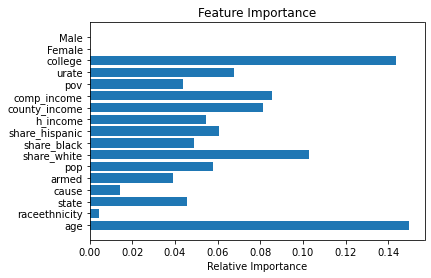

In [141]:
X_feature_importance = X_train.keys().tolist()
y_feature_importance = model_decision_tree.feature_importances_

plt.barh(X_feature_importance, y_feature_importance, align='center')
plt.xlabel('Relative Importance')
plt.title('Feature Importance')
plt.show()

In [142]:
random_forest = RandomForestClassifier()
model_random_forest = random_forest.fit(X_train, y_train)
y_pred_random_forest = model_random_forest.predict(X_test)
y_pred_random_forest


print("Random Forest Scores -->")
print("Accuracy: {}".format(round(accuracy_score(y_test, y_pred_random_forest), 2)))
print("F1 Score: {}".format(round(f1_score(y_test, y_pred_random_forest, average='weighted'), 2)))
print("Recall Score: {}".format(round(recall_score(y_test, y_pred_random_forest, average='weighted'), 2)))
print("Precision Score: {}".format(round(precision_score(y_test, y_pred_random_forest, average='weighted'), 2)))

Random Forest Scores -->
Accuracy: 0.44
F1 Score: 0.4
Recall Score: 0.44
Precision Score: 0.42


In [143]:
pprint(random_forest.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [144]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

n_estimators = [100, 200, 300, 400, 500]
max_features = ['auto', 'sqrt']
max_depth = [10, 20, 30, 40, 50]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 
              'max_features': max_features, 
              'max_depth': max_depth, 
              'bootstrap': bootstrap}


In [145]:
rscv = RandomizedSearchCV(estimator = random_forest,
                          param_distributions = random_grid,
                          n_iter = 50,
                          cv = 5,
                          n_jobs = -1)

rscv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [146]:
# Best Random Forest
rscv.best_params_

{'n_estimators': 400,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [147]:
random_forest = RandomForestClassifier(n_estimators = 400, 
                                       max_features = 'auto',
                                       max_depth = 10,
                                       bootstrap = True)
model_random_forest = random_forest.fit(X_train, y_train)
y_pred_random_forest = model_random_forest.predict(X_test)
y_pred_random_forest


print("Random Forest Scores -->")
print("Accuracy: {}".format(round(accuracy_score(y_test, y_pred_random_forest), 2)))
print("F1 Score: {}".format(round(f1_score(y_test, y_pred_random_forest, average='weighted'), 2)))
print("Recall Score: {}".format(round(recall_score(y_test, y_pred_random_forest, average='weighted'), 2)))
print("Precision Score: {}".format(round(precision_score(y_test, y_pred_random_forest, average='weighted'), 2)))

Random Forest Scores -->
Accuracy: 0.45
F1 Score: 0.41
Recall Score: 0.45
Precision Score: 0.46
